## Bibliotecas

In [ ]:
! pip install roboticstoolbox-python ipywidgets rich

## Funcionamento da Robotics ToolBox

Conceitos Fundamentais
1. Parâmetros de Denavit-Hartenberg (DH)

Os parâmetros de Denavit-Hartenberg são uma convenção usada para descrever a geometria de um robô em termos de suas juntas e elos. Para cada elo do robô, utilizamos quatro parâmetros DH:

- d: Deslocamento ao longo do eixo 𝑧 (offset).

- a: Comprimento do elo ao longo do eixo 𝑥 anterior (link length).

- α: Ângulo de torção ao longo do eixo 𝑥 (link twist).

- θ: Ângulo de rotação ao redor do eixo 𝑧 (joint angle).

Esses parâmetros permitem representar a relação entre cada elo e sua junta de forma padronizada, facilitando o cálculo da posição e orientação do manipulador.

No código abaixo, o robô é definido com dois elos, ambos com juntas revolutas. Usamos o modelo de Denavit-Hartenberg para definir cada elo, e a cinemática direta e inversa é calculada com base nesses parâmetros.

## Exemplo: Puma 560

### Importando a toolbox de robótica como uma biblioteca

In [40]:
import roboticstoolbox as rtb   
from rich.console import Console
from rich.text import Text

### Carregando um robô exemplo, Puma 560.

In [41]:
puma = rtb.models.DH.Puma560()

# Create a console object for rich output, adjusted for Jupyter
console = Console(force_jupyter=True)

# Format the robot information as plain text without ANSI codes
formatted_text = Text.from_ansi(str(puma))

# Use the rich console to print the DH parameters, forcing plain text in Jupyter
console.print(formatted_text)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴───────┴─────┴──────┴─────┘

### Posição Inicial

In [39]:
# Directly print the Puma 560 model's DH parameters
print(puma.qr)

[ 0.          1.57079633 -1.57079633  0.          0.          0.        ]


#### Explicação 

O comando `print(puma.qr)` exibe a **posição de prontidão** (ou posição "inicial")  do robô Puma 560, uma configuração específica das articulações chamada também de posição de repouso. Essa posição é frequentemente usada em robótica como ponto de partida ou retorno após a execução de uma tarefa.

#### Ao executar o comando:

```python
print(puma.qr)
```
A saída sera a lista `[ 0. 1.5708 -1.5708 0. 0. 0. ]`, que corresponde aos **ângulos das articulações** (em radianos) para cada uma das seis articulações (ou juntas) do robô Puma 560, quando ele está em sua **posição de prontidão**.

Cada valor representa o ângulo de uma articulação específica:

- **Articulação 1 (q1)**: `0.0` radianos (0 graus) – A base do robô está alinhada com o quadro de referência global. 
- **Articulação 2 (q2)**: `+1.5708` radianos (90 graus) – A segunda articulação está rotacionada 90°. 
- **Articulação 3 (q3)**: `-1.5708` radianos (-90 graus) – A terceira articulação está rotacionada -90°. 
- **Articulação 4 (q4)**: `0.0` radianos (0 graus) – A quarta articulação está alinhada, sem rotação. 
- **Articulação 5 (q5)**: `0.0` radianos (0 graus) – A quinta articulação também está alinhada. 
- **Articulação 6 (q6)**: `0.0` radianos (0 graus) – A sexta e última articulação também está alinhada.

#### Conversão para Graus

Se convertermos esses valores para **graus**, fica assim:

- `1.5708` radianos = 90 graus,
- `-1.5708` radianos = -90 graus,
- Os valores `0.0` radianos correspondem a 0 graus (sem rotação).

Assim, a posição de prontidão do robô é:

- **Articulação 1**: 0° (sem rotação),
- **Articulação 2**: 90° (rotacionada 90°),
- **Articulação 3**: -90° (rotacionada -90°),
- **Articulação 4**: 0° (sem rotação),
- **Articulação 5**: 0° (sem rotação),
- **Articulação 6**: 0° (sem rotação).

#### Visualizando a Posição de Prontidão    

Nessa posição, o robô Puma 560 está **"pronto"** para realizar movimentações a partir de uma posição neutra. Isso significa que as articulações 2 e 3 estão rotacionadas para colocar o braço em uma posição perpendicular ao chão, enquanto as outras articulações estão alinhadas sem rotação.

### Cinemática Direta

A **Cinemática Direta (Forward Kinematics)** calcula a posição e a orientação do efetuador final do robô (a extremidade que interage com o ambiente) dado um conjunto de ângulos nas articulações.

In [44]:
q =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
T = puma.fkine(q)  # Forward Kinematics
print("Matriz de Transformação Homogênea")
print(T)

Matriz de Transformação Homogênea
   0.1217   -0.6067   -0.7856    0.2478    
   0.8184    0.5092   -0.2665   -0.1259    
   0.5617   -0.6105    0.5584    1.146     
   0         0         0         1         



#### Detalhes

- **`puma.fkine([...])`**: Esta função calcula a **matriz de transformação homogênea** \( T \), que descreve tanto a **posição** quanto a **orientação** do efetuador final do robô.

  - Os valores `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]` representam os ângulos das articulações do robô em **radianos**.

#### Interpretação da Matriz de Transformação Homogênea \( T \)

A matriz de transformação homogênea \( T \) pode ser interpretada da seguinte forma:

- **Primeiras três colunas**: Representam a **orientação** do efetuador final nos eixos X, Y e Z.
- **Última coluna**: Representa a **posição** do efetuador final no espaço 3D, com as coordenadas \( (0.2478, -0.1259, 1.146) \).
- **Última linha**: Essa linha faz parte da estrutura homogênea da matriz, onde `[0, 0, 0, 1]` é um padrão fixo.





### Cinemática Inversa

A **cinemática inversa** resolve o problema de encontrar os **ângulos das articulações** que fazem com que o robô atinja uma posição e orientação desejadas. Dado o objetivo **T** (a matriz de transformação homogênea que descreve a posição e orientação do efetuador final), a função retorna os ângulos das articulações correspondentes.

In [45]:
sol = puma.ikine_LM(T) # Inverse Kinematics
print(sol)

IKSolution: q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6], success=True, iterations=21, searches=1, residual=3.67e-11


#### Detalhes:

- **`puma.ikine_LM(T)`**: Esta função usa o algoritmo de **Levenberg-Marquardt (LM)** para calcular os ângulos das articulações \( q \) necessários para alcançar a posição e orientação definidas pela matriz \( T \).
  - A matriz \( T \) é obtida a partir da **cinemática direta** ou pode ser fornecida como entrada.


#### Explicação:

- **`q`**: Esses são os ângulos calculados para as articulações. Neste caso:
  - **Articulação 1**: `0.1` radianos,
  - **Articulação 2**: `2.025` radianos,
  - **Articulação 3**: `2.936` radianos,
  - **Articulação 4**: `-2.894` radianos,
  - **Articulação 5**: `-2.273` radianos,
  - **Articulação 6**: `-2.025` radianos.
  
- **`success=True`**: Indica que a solução foi encontrada com sucesso.
- **`iterations=14`**: Número de iterações que o algoritmo levou para encontrar a solução.
- **`searches=1`**: Número de tentativas feitas pelo algoritmo para encontrar a solução.
- **`residual=4.91e-10`**: O erro residual, que é uma medida de quão precisa é a solução. Quanto menor o residual, mais próximo o resultado está do valor exato.

#### Resumo:

A **cinemática inversa** é um processo essencial para encontrar os ângulos das articulações que permitem que o robô atinja uma posição e orientação específicas. No caso do robô Puma 560, o algoritmo **Levenberg-Marquardt** foi capaz de encontrar com sucesso os ângulos das articulações, minimizando o erro residual.

## Construindo um Robô

### 1. Bibliotecas

In [54]:
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH, PrismaticDH
import matplotlib.pyplot as plt
from time import sleep


### 2. Definição do Robô

Agora, vamos definir um robô de dois elos usando os parâmetros de Denavit-Hartenberg. Usaremos a classe `DHRobot` para representar o robô, e a classe `RevoluteDH` para descrever as juntas revolutas.

In [48]:
# Standard DH parameters for the Puma 560
robot = DHRobot([
        RevoluteDH(d=0.6718,  a=0,       alpha=np.pi/2),  # Joint 1
        RevoluteDH(d=0,       a=0.4318,  alpha=0),        # Joint 2
        RevoluteDH(d=0.15005, a=0.0203,  alpha=-np.pi/2), # Joint 3
        RevoluteDH(d=0.4318,  a=0,       alpha=np.pi/2),  # Joint 4
        RevoluteDH(d=0,       a=0,       alpha=-np.pi/2), # Joint 5
        RevoluteDH(d=0,       a=0,       alpha=0)         # Joint 6
    ], name='Puma 560') 

In [47]:
# Create a console object for rich output, adjusted for Jupyter
console = Console(force_jupyter=True)

# Format the robot information as plain text without ANSI codes
formatted_text = Text.from_ansi(str(puma))

# Use the rich console to print the DH parameters, forcing plain text in Jupyter
console.print(formatted_text)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴───────┴─────┴──────┴─────┘

#### 3. Definição dos Ângulos das Juntas

Os ângulos das juntas são definidos em radianos. Para este exemplo, configuramos os ângulos iniciais como \( \pi/4 \) e \( \pi/6 \), ou seja, 45 e 30 graus respectivamente.


In [55]:
# Definição dos ângulos das juntas (radianos)
joint_angles = [np.pi/4, np.pi/6, np.pi/4, np.pi/6, np.pi/4, np.pi/6]

#### 4. Cálculo da Cinemática Direta

A cinemática direta envolve o cálculo da posição e orientação do "end-effector" (extremidade do robô) a partir dos ângulos das juntas. Vamos usar o método `fkine()` para calcular a transformação homogênea \( T \), que descreve a pose do "end-effector".


In [60]:
T = robot.fkine(joint_angles)
print("Cinemática Direta (end-effector pose):")
# Create a console object for rich output, adjusted for Jupyter
console = Console(force_jupyter=True)

# Format the robot information as plain text without ANSI codes
formatted_text = Text.from_ansi(str(T))

# Use the rich console to print the DH parameters, forcing plain text in Jupyter
console.print(formatted_text)


Cinemática Direta (end-effector pose):


-0.8896   -0.2991   -0.345     0.07931   
   0.1557    0.5115   -0.845    -0.1329    
   0.4293   -0.8055   -0.4085    1.019     
   0         0         0         1       

#### 5. Cálculo da Cinemática Inversa

A cinemática inversa calcula os ângulos das juntas que resultam em uma determinada pose do "end-effector". Usamos o método `ikine_LM()`, que aplica o algoritmo de Levenberg-Marquardt para resolver numericamente a cinemática inversa.


In [57]:
# Cálculo da cinemática inversa usando o método Levenberg-Marquardt
solution = robot.ikine_LM(T)
print("Inverse kinematics (joint angles):\n", solution.q)

Inverse kinematics (joint angles):
 [0.29076099 2.61797989 2.45015037 1.82339591 2.31749375 2.54604885]


#### 6. Visualização do Robô

Vamos visualizar o robô na configuração definida pelos ângulos das juntas. Para isso, usamos o método `plot()`, que gera um gráfico 3D do robô em sua configuração atual.


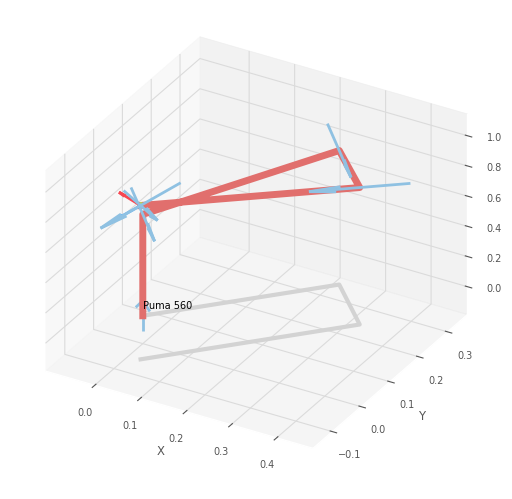

<Figure size 640x480 with 0 Axes>

In [61]:
# Visualização do robô
robot.plot(joint_angles)
plt.show()

### Conclusão

Neste notebook, exploramos o uso dos parâmetros de Denavit-Hartenberg para modelar um robô simples com duas juntas revolutas. Usamos a cinemática direta para calcular a posição do "end-effector" a partir de ângulos das juntas e a cinemática inversa para determinar os ângulos necessários para alcançar uma posição desejada.

A visualização gráfica e o modo interativo também foram ferramentas importantes para entender como o robô se comporta em diferentes configurações de juntas.
